In [1]:
# load the libraries
library(OpenStreetMap)
library(ggplot2)
library(sp)
library (rgdal)

# Extreme points of the European Union
# https://en.wikipedia.org/wiki/Extreme_points_of_the_European_Union
LAT1 =  72 ; LAT2 = 34
LON1 = -12 ; LON2 = 40

code for methods in class “Rcpp_SpExtent” was not checked for suspicious field assignments (recommended package ‘codetools’ not available?)

code for methods in class “Rcpp_SpExtent” was not checked for suspicious field assignments (recommended package ‘codetools’ not available?)

code for methods in class “Rcpp_SpPoly” was not checked for suspicious field assignments (recommended package ‘codetools’ not available?)

code for methods in class “Rcpp_SpPoly” was not checked for suspicious field assignments (recommended package ‘codetools’ not available?)

code for methods in class “Rcpp_SpPolyPart” was not checked for suspicious field assignments (recommended package ‘codetools’ not available?)

code for methods in class “Rcpp_SpPolyPart” was not checked for suspicious field assignments (recommended package ‘codetools’ not available?)

code for methods in class “Rcpp_SpPolygons” was not checked for suspicious field assignments (recommended package ‘codetools’ not available?)

code for me

In [3]:
library("rgbif")

# load gbif ocurrences
key <- name_backbone(name='Strix aluco')$speciesKey
strix <- occ_search(taxonKey=key, limit = 1000)
# head(strix$data)
write.csv(strix$data, "data/strix.csv")
print("done writing data")

[1] "done writing data"


In [5]:
library(readr)
strix_df_all <- read_csv("data//strix.csv")
print("done reading data")

Warning message:
“Missing column names filled in: 'X1' [1]”
Parsed with column specification:
cols(
  .default = col_character(),
  X1 = col_double(),
  key = col_double(),
  decimalLatitude = col_double(),
  decimalLongitude = col_double(),
  lastCrawled = col_datetime(format = ""),
  lastParsed = col_datetime(format = ""),
  crawlId = col_double(),
  taxonKey = col_double(),
  kingdomKey = col_double(),
  phylumKey = col_double(),
  classKey = col_double(),
  orderKey = col_double(),
  familyKey = col_double(),
  genusKey = col_double(),
  speciesKey = col_double(),
  acceptedTaxonKey = col_double(),
  dateIdentified = col_datetime(format = ""),
  coordinateUncertaintyInMeters = col_double(),
  year = col_double(),
  month = col_double()
  # ... with 16 more columns
)

See spec(...) for full column specifications.



[1] "done reading data"


In [10]:
strix_df_all$x = floor(strix_df_all$decimalLongitude)
strix_df_all$y = floor(strix_df_all$decimalLatitude)
head(strix_df_all)
range(strix_df_all$x)
range(strix_df_all$y)


X1 key        scientificName             decimalLatitude decimalLongitude
1 1  2543096747 Strix aluco Linnaeus, 1758 55.77846        37.798170       
2 2  2544029255 Strix aluco Linnaeus, 1758 63.84535        11.329319       
3 3  2544029542 Strix aluco Linnaeus, 1758 59.07164        10.196211       
4 4  2544031107 Strix aluco Linnaeus, 1758 58.93046         9.500556       
5 5  2544033805 Strix aluco Linnaeus, 1758 60.43911        10.484893       
6 6  2544036214 Strix aluco Linnaeus, 1758 60.64217        10.954506       
  issues         datasetKey                          
1 cdround,gass84 50c9509d-22c7-4a22-a47d-8c48425ef4a7
2 cdround,gass84 b124e1e0-4755-430f-9eab-894f25a9b59c
3 cdround,gass84 b124e1e0-4755-430f-9eab-894f25a9b59c
4 cdround,gass84 b124e1e0-4755-430f-9eab-894f25a9b59c
5 cdround,gass84 b124e1e0-4755-430f-9eab-894f25a9b59c
6 cdround,gass84 b124e1e0-4755-430f-9eab-894f25a9b59c
  publishingOrgKey                     installationKey                     
1 28eb1a3f-1c15-4a95-931a-4af90ecb574d 997448a8-f762-11e1-a439-00145eb45e9a
2 d3978a37-635a-4ae3-bb85-7b4d41bc0b88 7bdf9f6d-317a-45ec-8bb7-7ff61345d6a6
3 d3978a37-635a-4ae3-bb85-7b4d41bc0b88 7bdf9f6d-317a-45ec-8bb7-7ff61345d6a6
4 d3978a37-635a-4ae3-bb85-7b4d41bc0b88 7bdf9f6d-317a-45ec-8bb7-7ff61345d6a6
5 d3978a37-635a-4ae3-bb85-7b4d41bc0b88 7bdf9f6d-317a-45ec-8bb7-7ff61345d6a6
6 d3978a37-635a-4ae3-bb85-7b4d41bc0b88 7bdf9f6d-317a-45ec-8bb7-7ff61345d6a6
  publishingCountry ⋯ occurrenceRemarks lifeStage habitat samplingProtocol
1 US                ⋯ NA                NA        NA      NA              
2 NO                ⋯ NA                NA        NA      NA              
3 NO                ⋯ NA                NA        NA      NA              
4 NO                ⋯ NA                NA        NA      NA              
5 NO                ⋯ NA                NA        NA      NA              
6 NO                ⋯ NA                NA        NA      NA              
  coordinatePrecision elevation elevationAccuracy footprintWKT x  y 
1 NA                  NA        NA                NA           37 55
2 NA                  NA        NA                NA           11 63
3 NA                  NA        NA                NA           10 59
4 NA                  NA        NA                NA            9 58
5 NA                  NA        NA                NA           10 60
6 NA                  NA        NA                NA           10 60

[1] -4 37

[1] 40 63

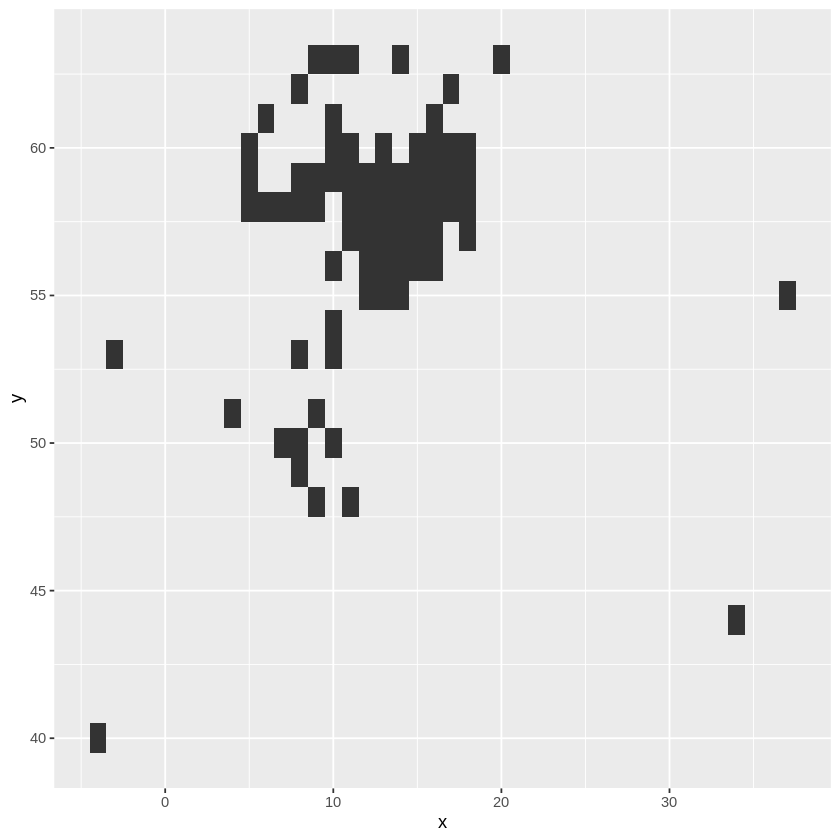

In [13]:
ggplot(strix_df_all) +
    geom_tile(aes(x, y))

In [14]:
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [20]:
strix_dist <- strix_df_all %>%
    group_by(x,y) %>%
    tally()

In [17]:
aggregate(strix_df_all, by=list(strix_df_all$x), FUN=length)

Group.1 X1  key scientificName decimalLatitude decimalLongitude issues
1  -4        1   1   1              1               1                1   
2  -3        1   1   1              1               1                1   
3   4        1   1   1              1               1                1   
4   5       26  26  26             26              26               26   
5   6        6   6   6              6               6                6   
6   7        9   9   9              9               9                9   
7   8       13  13  13             13              13               13   
8   9       14  14  14             14              14               14   
9  10       52  52  52             52              52               52   
10 11       74  74  74             74              74               74   
11 12      129 129 129            129             129              129   
12 13      145 145 145            145             145              145   
13 14       88  88  88             88              88               88   
14 15       62  62  62             62              62               62   
15 16      128 128 128            128             128              128   
16 17      163 163 163            163             163              163   
17 18       78  78  78             78              78               78   
18 20        6   6   6              6               6                6   
19 34        2   2   2              2               2                2   
20 37        2   2   2              2               2                2   
   datasetKey publishingOrgKey installationKey ⋯ occurrenceRemarks lifeStage
1    1          1                1             ⋯   1                 1      
2    1          1                1             ⋯   1                 1      
3    1          1                1             ⋯   1                 1      
4   26         26               26             ⋯  26                26      
5    6          6                6             ⋯   6                 6      
6    9          9                9             ⋯   9                 9      
7   13         13               13             ⋯  13                13      
8   14         14               14             ⋯  14                14      
9   52         52               52             ⋯  52                52      
10  74         74               74             ⋯  74                74      
11 129        129              129             ⋯ 129               129      
12 145        145              145             ⋯ 145               145      
13  88         88               88             ⋯  88                88      
14  62         62               62             ⋯  62                62      
15 128        128              128             ⋯ 128               128      
16 163        163              163             ⋯ 163               163      
17  78         78               78             ⋯  78                78      
18   6          6                6             ⋯   6                 6      
19   2          2                2             ⋯   2                 2      
20   2          2                2             ⋯   2                 2      
   habitat samplingProtocol coordinatePrecision elevation elevationAccuracy
1    1       1                1                   1         1              
2    1       1                1                   1         1              
3    1       1                1                   1         1              
4   26      26               26                  26        26              
5    6       6                6                   6         6              
6    9       9                9                   9         9              
7   13      13               13                  13        13              
8   14      14               14                  14        14              
9   52      52               52                  52        52              
10  74      74               74                  74        74           

In [21]:
strix_dist

x  y  n  
1  -4 40  1 
2  -3 53  1 
3   4 51  1 
4   5 58  2 
5   5 59  5 
6   5 60 19 
7   6 58  4 
8   6 61  2 
9   7 50  1 
10  7 58  8 
11  8 49  2 
12  8 50  1 
13  8 53  1 
14  8 58  7 
15  8 59  1 
16  8 62  1 
17  9 48  1 
18  9 51  1 
19  9 58  3 
20  9 59  6 
21  9 63  3 
22 10 50  1 
23 10 53  1 
24 10 54  3 
25 10 56  1 
26 10 59 27 
27 10 60  4 
28 10 61  1 
29 10 63 14 
30 11 48  4 
⋮  ⋮  ⋮  ⋮  
45 13 59  26
46 13 60   1
47 14 55   9
48 14 56  28
49 14 57  34
50 14 58  10
51 14 59   6
52 14 63   1
53 15 56  11
54 15 57   9
55 15 58   7
56 15 59  32
57 15 60   3
58 16 56  38
59 16 57  41
60 16 58  16
61 16 59  31
62 16 60   1
63 16 61   1
64 17 58  11
65 17 59 144
66 17 60   6
67 17 62   2
68 18 57   2
69 18 58   1
70 18 59  73
71 18 60   2
72 20 63   6
73 34 44   2
74 37 55   2

In [23]:
ggplot(strix_dist) +
    geom_tile(aes(x, y, fill=n))

In [24]:
map <- openmap(c(LAT2,LON1), c(LAT1,LON2),
               zoom = 2,
               type = "stamen-toner",
               mergeTiles = TRUE)
print("done loading map")

[1] "done loading map"


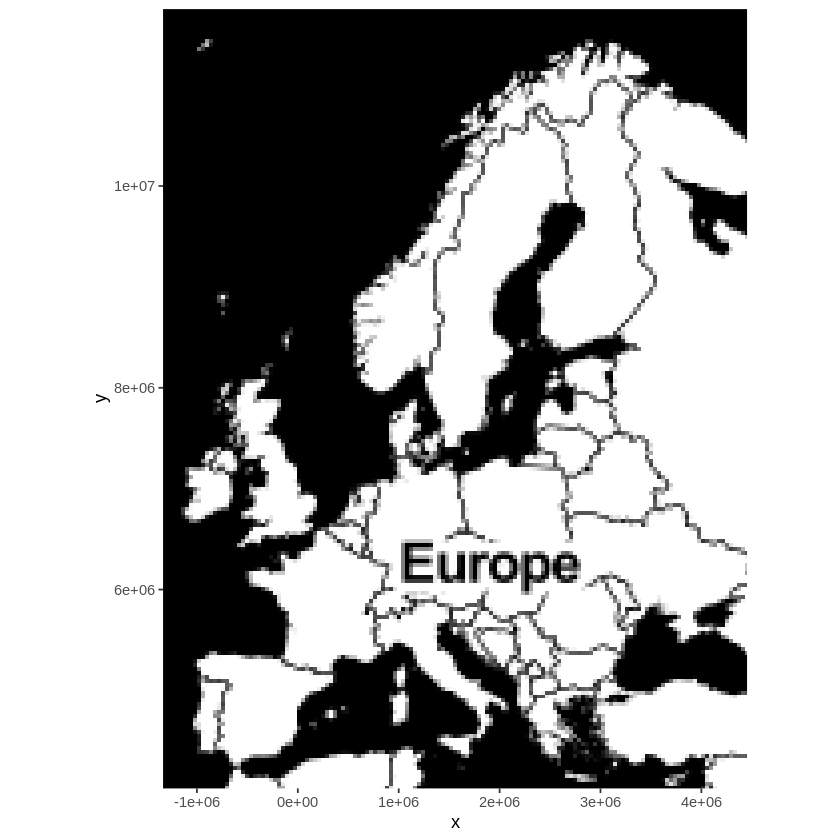

In [25]:
autoplot(map)

In [30]:
autoplot(map) +
    geom_tile(
        data = data.frame(strix_dist), 
        aes(x, y, fill=n)
    )

In [33]:
library(maps)
world_df <- map_data("world")

Warning message:
“Removed 84110 row(s) containing missing values (geom_path).”


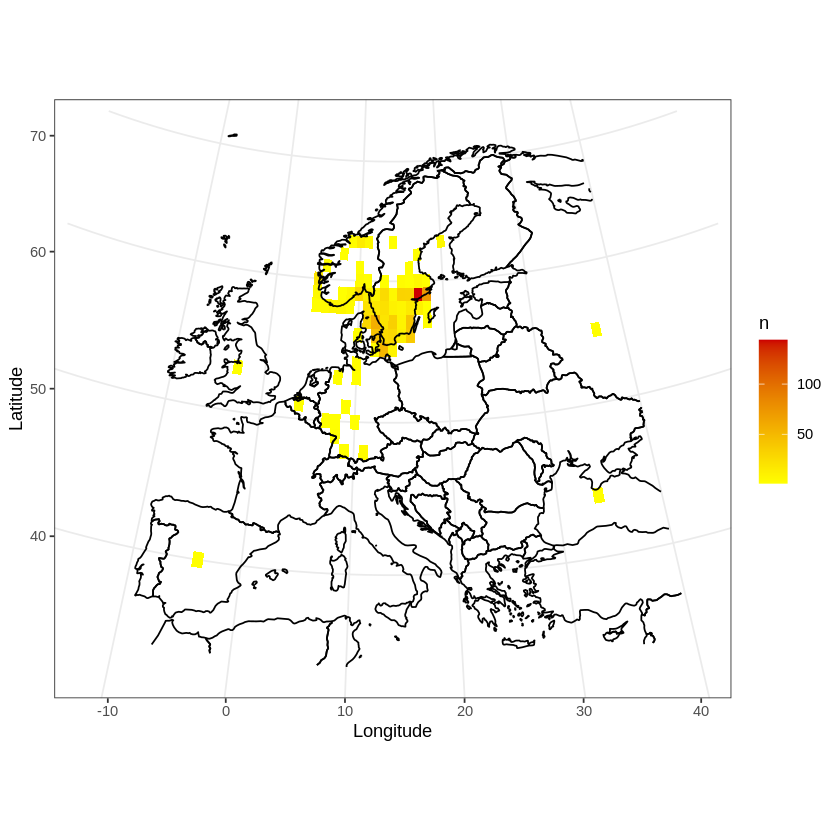

In [83]:
ggplot(strix_dist) +
    geom_tile(aes(x, y, fill=n)) +
    geom_path(aes(x = long, y = lat, group=group), data = world_df) +
    xlim(c(LON1, LON2)) + ylim(c(LAT2, LAT1)) + 
    theme_bw() + 
    scale_fill_gradient(low="yellow", high="red3") +
    labs(x="Longitude", y="Latitude") + coord_map(projection="albers", parameters=c(14,50))

In [84]:
ggplot(strix_dist) +
    geom_tile(aes(x, y, fill=n)) +
    geom_path(aes(x = long, y = lat, group=group), data = world_df) +
    xlim(c(LON1, LON2)) + ylim(c(LAT2, LAT1)) + 
    theme_bw() + 
    scale_fill_gradient(low="yellow", high="red3") +
    labs(x="Longitude", y="Latitude") + coord_map(projection="azequalarea")

Warning message:
“Removed 84110 row(s) containing missing values (geom_path).”
